# Get data

(18464, 11)
how much NEUT is missing: 1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
how much RT is missing: 1
how much NEUT is missing: 1
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
how much RT is missing: 1
how much CP is missing: 1
how much CT is missing: 1
how much CP is missing: 1
how much CT is missing: 1
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]
how much RT is missing: 1
how much NEUT is missing: 1
how much NEUT is missing: 1
final tallies
corr value mean
0.07333816181274913
[0.35355339059327373, -0.7905694150420949, 0.20519567041703085, -0.7999999999999999, -0.2635231383473649, -0.6, -0.05129891760425771, 0.28867513459481287, 0.4103913408340617, 0.31622776601683794, -0.8720815992723809, 0.7905694150420949, -0.11180339887498948, 0.8944271909999159, 0.8660254037844386, 0.4472135954999579, -0.35909242322980395, 0.5797509043642028, 0.11180339887498948, 0.05129891760425771]


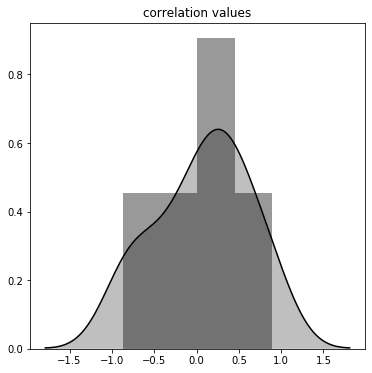

n conditions [5, 4, 2, 1, 1, 5, 2, 3, 1, 1, 4, 4, 2, 5, 4, 4, 3, 5, 1, 1]
 avg: 2.9

rt conditions [1, 2, 4, 5, 4, 4, 4, 1, 2, 3, 5, 5, 3, 3, 1, 2, 5, 2, 2, 2]
 avg: 3.0

rp conditions [3, 1, 1, 3, 5, 2, 1, 4, 4, 4, 1, 2, 5, 2, 3, 3, 2, 3, 4, 3]
 avg: 2.8

ct conditions [2, 5, 5, 2, 3, 3, 5, 2, 3, 2, 2, 1, 1, 4, 2, 1, 1, 4, 5, 4]
 avg: 2.85

cp conditions [4, 3, 3, 4, 2, 1, 3, 5, 5, 5, 3, 3, 4, 1, 5, 5, 4, 1, 3, 5]
 avg: 3.45

# of times correct per condition
14,15,14,14,14
# time forget per condition
[1, 1, 1, 1, 1]


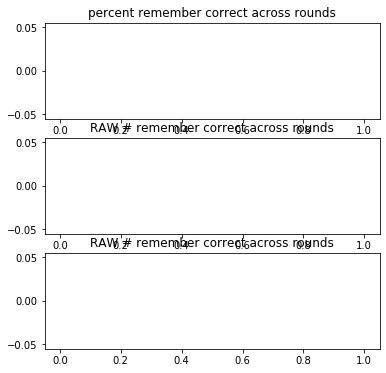



# of times correct per condition
2,5,2,5,4
# time forget per condition
[7, 7, 5, 6, 4]


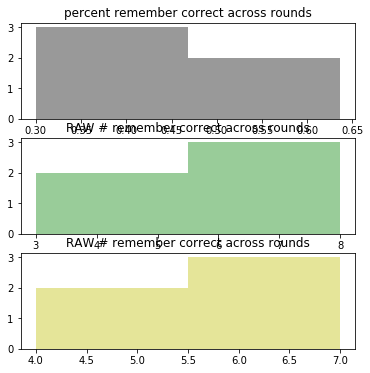



# of times correct per condition
2,10,6,5,2
# time forget per condition
[6, 4, 4, 5, 8]


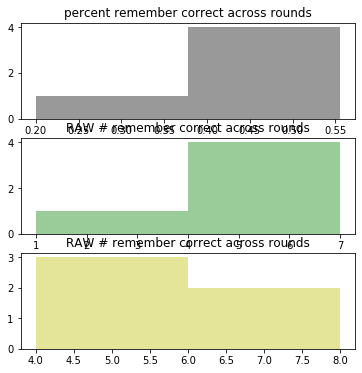



# of times correct per condition
10,2,4,8,3
# time forget per condition
[1, 8, 4, 4, 6]


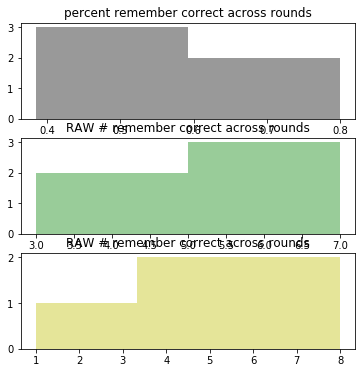



# of times correct per condition
15,0,15,14,14
# time forget per condition
[1, 0, 1, 1, 0]


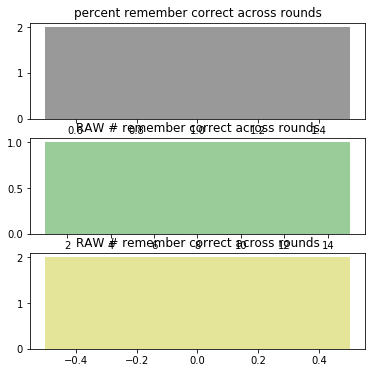



# of times correct per condition
8,11,14,9,7
# time forget per condition
[1, 2, 0, 5, 0]


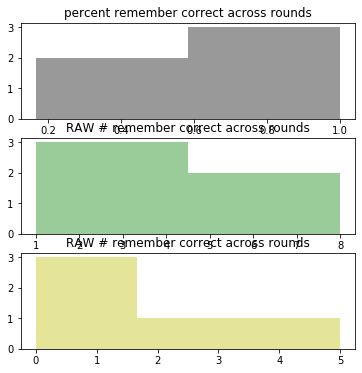



# of times correct per condition
14,8,14,12,5
# time forget per condition
[1, 3, 0, 2, 6]


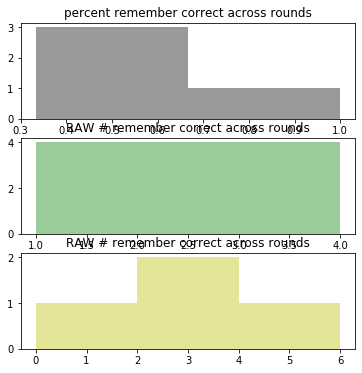



# of times correct per condition
15,15,15,14,14
# time forget per condition
[1, 1, 1, 1, 1]


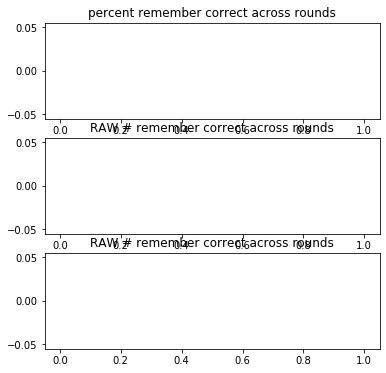



# of times correct per condition
6,7,7,5,4
# time forget per condition
[3, 2, 3, 6, 7]


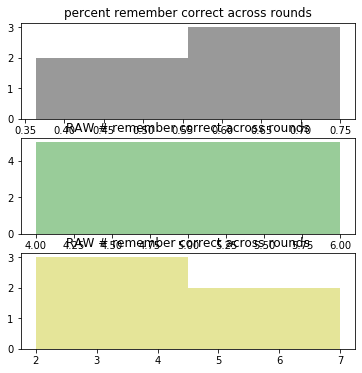



# of times correct per condition
6,8,5,5,6
# time forget per condition
[3, 0, 2, 7, 6]


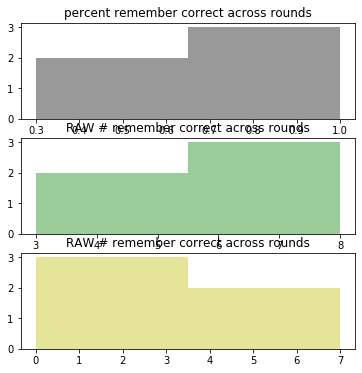



# of times correct per condition
4,4,8,5,3
# time forget per condition
[4, 3, 1, 7, 6]


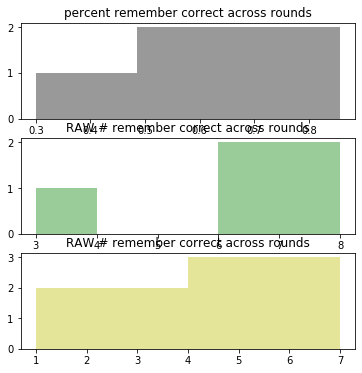



# of times correct per condition
8,5,5,4,8
# time forget per condition
[3, 4, 7, 8, 3]


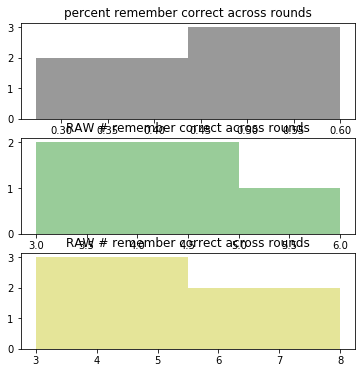



# of times correct per condition
9,15,15,14,15
# time forget per condition
[1, 1, 1, 1, 1]


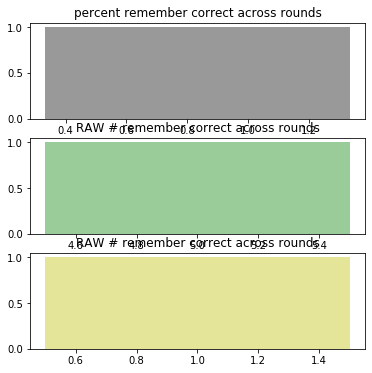



# of times correct per condition
15,2,15,14,15
# time forget per condition
[1, 1, 1, 1, 1]


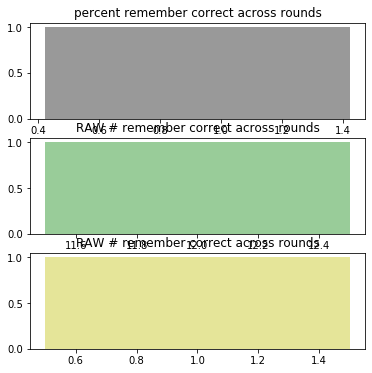



# of times correct per condition
15,15,14,14,14
# time forget per condition
[1, 1, 1, 1, 1]


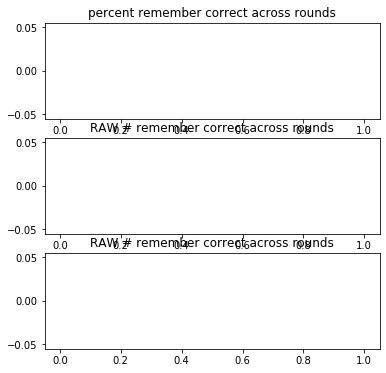



# of times correct per condition
15,15,14,13,15
# time forget per condition
[1, 1, 1, 1, 1]


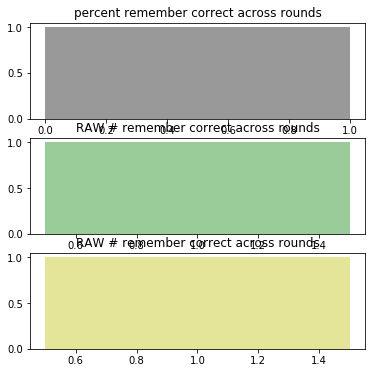



# of times correct per condition
5,1,11,5,6
# time forget per condition
[4, 6, 2, 4, 5]


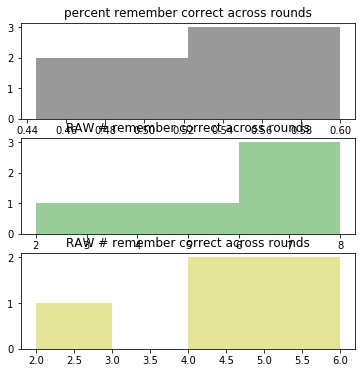



# of times correct per condition
8,4,4,8,2
# time forget per condition
[2, 4, 7, 5, 8]


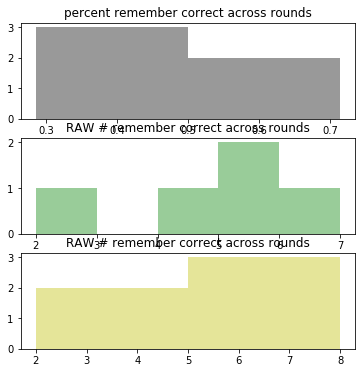



# of times correct per condition
14,15,15,12,15
# time forget per condition
[1, 1, 1, 1, 1]


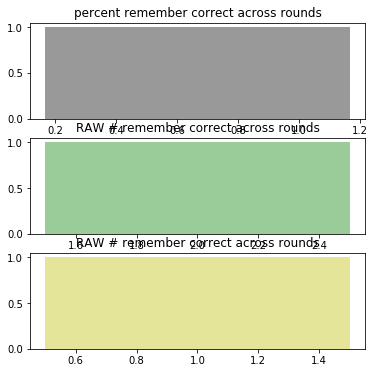



# of times correct per condition
15,14,15,13,10
# time forget per condition
[1, 0, 1, 2, 0]


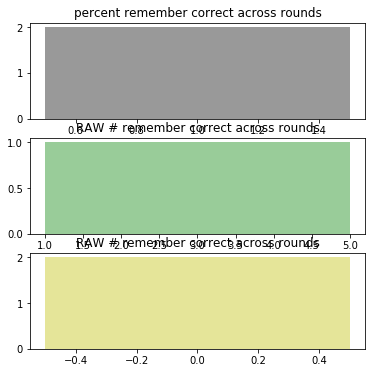



average putative distortions: 3.0
average forgetting: 0.0


In [109]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr as corrS
#load  in data and just consider columsn of importance for analysis
df_task1=pd.read_csv('../../raw_data/pilot_3a.csv')

df_task_v1=df_task1[['Participant Public ID','Correct','display','forced_choice','Response','image2','test_image1', 
                   'test_image2','test_image1_value','distractor_key',
                   'test_image2_value']]
df_task_r=df_task_v1
print(df_task_r.shape)
#best answers per condition: lists
rt1=[]
rtc=[]
rte=[] #if they answered incorrectly, did they even choose an eligible action?

rp1=[]
rpc=[] # what number condition was it?
rpe=[]

cp1=[]
cpc=[]
cpe=[]

n2=[]
nc=[]
ne=[]

ct1=[]
ctc=[]
cte=[]

impossible_actions=[]

#count missing entries per condition
mrt1=0
mrp1=0
mcp1=0
mct1=0
mn2=0

acceptable_answers=['right','up','left']

all_sub_IDs=[]
value_differential=[]
miss_subs=[]

#subject specific data
rt_sub=[]
ct_sub=[]
rp_sub=[]
cp_sub=[]
neut2_sub=[]
t_counter=0
sub_counter=0
choice_data_3d=np.zeros((20,5,15)) #to be populated below
for version in range(1):
    final_row=18459
    temp_row=[]
    test_counter=0
    counter=0
    conditions=[]
    best_action_tally=0
    condition_counter=0
    temp_dict={}
    current_subject=0
    current_choice_data=[]

    for row,data in df_task_r.iterrows():
        if str(df_task_r['distractor_key'][row]).endswith('rare.jpg'):
            dict_entry='{}_worst'.format(str(df_task_r['image2'][row][:-4]))
            if dict_entry not in temp_dict:
                temp_dict[dict_entry]=str(df_task_r['forced_choice'][row][:-4])
        elif str(df_task_r['distractor_key'][row]).endswith('common.jpg'):
            dict_entry='{}_best'.format(str(df_task_r['image2'][row][:-4]))
            if dict_entry not in temp_dict:
                temp_dict[dict_entry]=str(df_task_r['forced_choice'][row][:-4])
            
                    
    
        elif str(df_task_r['display'][row]).startswith('test'):
            if counter==0:
                all_sub_IDs.append(df_task_r['Participant Public ID'][row+20])
                counter+=1
            

                   
            #Get values and convert from strings to floating point
            value1=df_task_r['test_image1_value'][row]
            if "p" in value1:
                if value1.startswith('2'):
                    value1=float(value1[0:2])*.01
                else:   
                    value1=float(value1[0:4])

            else:
                if value1.startswith('£'):
                    value1=float(value1[1])
                else:
                    value1=float(value1[0])


            value2=df_task_r['test_image2_value'][row]
            if "p" in value2:
                if value2.startswith('2'):
                    value2=float(value2[0:2])*.01
                else:   
                    value2=float(value2[0:4])
            else:
                if value2.startswith('£'):
                    value2=float(value2[1])
                else:
                    value2=float(value2[0])


            if value1>value2:

                best_option=df_task_r['test_image1'][row][:-4]
            else:
                best_option=df_task_r['test_image2'][row][:-4]

            

            #for last subject only that doesn't meet the condition above for indexing
            if row==final_row:
                cp1.append(best_action_tally)
                cpc.append(5)
                cpe.append(counter_cpe)
                counter_cpe=0
                cp_sub=current_choice_data
                all_sub_IDs.append(df_task_r['Participant Public ID'][row])
               
                        
                        

            

                if len(neut2_sub)<15:
                    neut2_sub=[int(x) for x in neut2_sub+np.zeros(15-len(neut2_sub)).tolist()]

                if len(rt_sub)<15:
                    rt_sub=[int(x) for x in rt_sub+np.zeros(15-len(rt_sub)).tolist()]

                if len(rp_sub)<15:
                    rp_sub=[int(x) for x in rp_sub+np.zeros(15-len(rp_sub)).tolist()]

                if len(cp_sub)<15:
                    cp_sub=[int(x) for x in cp_sub+np.zeros(15-len(cp_sub)).tolist()]
                    
                if len(ct_sub)<15:
                    ct_sub=[int(x) for x in ct_sub+np.zeros(15-len(ct_sub)).tolist()]
           
                choice_data_3d[sub_counter,0]=neut2_sub
                choice_data_3d[sub_counter,1]=cp_sub
                choice_data_3d[sub_counter,2]=ct_sub
                choice_data_3d[sub_counter,3]=rp_sub
                choice_data_3d[sub_counter,4]=rt_sub
      
                sub_counter+=1
                condition_counter=0
                rt_sub=[]
                ct_sub=[]
                rp_sub=[]
                cp_sub=[]
                neut2_sub=[]
          

            elif row<final_row:
                cc=str(df_task_r['display'][row][5:-2])
                t_counter+=1
                if df_task_r['Response'][row] in acceptable_answers:
                    best_action_tally+=int(df_task_r['Correct'][row])
                    if int(df_task_r['Correct'][row])==1:
                        current_choice_data.append(1)
                    else:
                        current_worst='{}_worst'.format(best_option)
#                         print('current subject : {}, condition: {}, trials: {}'.format(current_subject,cc,t_counter))
#                         print(temp_dict[current_worst])
#                         print(df_task_r['Response'][row])
#                         print('\n')
                        if df_task_r['Response'][row]==temp_dict[current_worst]:
                            if cc=='common_positive':
                                counter_cpe+=1
                            
                            elif cc=='common_threat':
                                counter_cte+=1
                              
                            elif cc=='rare_positive':
                                counter_rpe+=1
                                
                            elif cc=='rare_threat':
                                counter_rte+=1
                             
                            elif cc=='neutral':
                                counter_ne+=1
                           

                        current_choice_data.append(0)

                    if current_subject==1:
                        if test_counter<21:
                            test_counter+=1
                            temp_row.append(np.abs(value1-value2))
                        else:
                            value_differential.append(temp_row)
                            temp_row=[]
                            test_counter=2
                            temp_row.append(np.abs(value1-value2))
                if t_counter==30:
#                     print('HERE')
                    temp_dict={}
                    condition_counter+=1
#                     print(conditions)
                    conditions.append(df_task_r['display'][row][5:])

                    if conditions[counter-1]=='rare_threat_1':
                        rt1.append(best_action_tally)
                        rt_sub=current_choice_data
#                         print('RT')
#                         print(rt_sub)
                        rtc.append(condition_counter)
                        rte.append(counter_rte)
                        counter_rte=0

                    elif conditions[counter-1]=='rare_positive_1':
                        rp1.append(best_action_tally)
                        rp_sub=current_choice_data
#                         print('RP')
#                         print(rp_sub)
                        rpc.append(condition_counter)
                        rpe.append(counter_rpe)
                        counter_rpe=0
                        


                    elif conditions[counter-1]=='common_positive_1':
                        cp1.append(best_action_tally)
                        cp_sub=current_choice_data
#                         print('CP')
#                         print(cp_sub)
                        cpc.append(condition_counter)
                        cpe.append(counter_cpe)
                        counter_cpe=0

                    elif conditions[counter-1]=='neutral_1':
                        n2.append(best_action_tally)
                        neut2_sub=current_choice_data
#                         print('NEUT')
#                         print(neut2_sub)
                        nc.append(condition_counter)
                        ne.append(counter_ne)
                        counter_ne=0

                    elif conditions[counter-1]=='common_threat_1':
                        ct1.append(best_action_tally)
                        ct_sub=current_choice_data
#                         print('CT')
#                         print(ct_sub)
                        ctc.append(condition_counter)
                        cte.append(counter_cte)
                        counter_cte=0

                    counter+=1
                    t_counter=0
                    best_action_tally=0
                    current_choice_data=[]


                    if condition_counter==5:
                        condition_counter=0
                        current_subject+=1

                        if len(neut2_sub)<15:
                            print('how much NEUT is missing: {}'.format(15-len(neut2_sub)))
                            mn2+=1
                            neut2_sub=[int(x) for x in neut2_sub+np.zeros(15-len(neut2_sub)).tolist()]


                        if len(rt_sub)<15:
                            print(rt_sub)
                            print('how much RT is missing: {}'.format(15-len(rt_sub)))
                            rt_sub=[int(x) for x in rt_sub+np.zeros(15-len(rt_sub)).tolist()]

                            mrt1+=1

                        if len(rp_sub)<15:
                            print('how much RP is missing: {}'.format(15-len(rp_sub)))
                            rp_sub=[int(x) for x in rp_sub+np.zeros(15-len(rp_sub)).tolist()]


                            mrp1+=1

                        if len(cp_sub)<15:
                            print('how much CP is missing: {}'.format(15-len(cp_sub)))
                            cp_sub=[int(x) for x in cp_sub+np.zeros(15-len(cp_sub)).tolist()]


                            mcp1+=1

                        if len(ct_sub)<15:
                            print('how much CT is missing: {}'.format(15-len(ct_sub)))
                            ct_sub=[int(x) for x in ct_sub+np.zeros(15-len(ct_sub)).tolist()]

                            mct1+=1



                        choice_data_3d[sub_counter,0]=neut2_sub
                        choice_data_3d[sub_counter,1]=cp_sub
                        choice_data_3d[sub_counter,2]=ct_sub
                        choice_data_3d[sub_counter,3]=rp_sub
                        choice_data_3d[sub_counter,4]=rt_sub
                        rt_sub=[]
                        ct_sub=[]
                        rp_sub=[]
                        cp_sub=[]
                        neut2_sub=[]

                        if len(all_sub_IDs)>=1:
                            all_sub_IDs.append(df_task_r['Participant Public ID'][row-400])
                        sub_counter+=1


    
corr_vals=[]    
print('final tallies')
for i in range(20):
    x=[n2[i],cp1[i],ct1[i],rp1[i],rt1[i]]
    y=[nc[i],cpc[i],ctc[i],rpc[i],rtc[i]]
    r,pval=corrS(x,y)
    
    corr_vals.append(r)

print('corr value mean')    
print(np.mean(corr_vals)) 
print(corr_vals)

f, axs = plt.subplots(1, 1, figsize=(6,6),sharex=True)

ax0=sns.distplot(corr_vals, hist=True,kde_kws={"shade": True},color="k", ax=axs)
ax0.set(title='correlation values',xlabel='')

plt.show()
    

order_data=[]
choice_data_3d = choice_data_3d.astype(int)

bad_subs=[1,4,13]
choice_data_clean=np.delete(choice_data_3d,(bad_subs),axis=0)

#np.save('choice_data',choice_data_3d)

print('n conditions {}\n avg: {}\n'.format(nc,np.mean(nc)))
print('rt conditions {}\n avg: {}\n'.format(rtc,np.mean(rtc)))
print('rp conditions {}\n avg: {}\n'.format(rpc,np.mean(rpc)))
print('ct conditions {}\n avg: {}\n'.format(ctc,np.mean(ctc)))
print('cp conditions {}\n avg: {}\n'.format(cpc,np.mean(cpc)))
                               

for i in range(20):
    forgetting=[]
    forgetting_raw=[]
    bad=[]
    print('# of times correct per condition')
    print('{},{},{},{},{}'.format(n2[i],cp1[i],ct1[i],rp1[i],rt1[i]))
    print('# time forget per condition')
    try:
        if n2[i]==15:
            n_d=1
        else:
            n_d=15-n2[i]
        if cp1[i]==15:
            cp_d=1
        else:
            cp_d=15-cp1[i]
        if ct1[i]==15:
            ct_d=1
        else:
            ct_d=15-ct1[i]
        if rp1[i]==15:
            rp_d=1
        else:
            rp_d=15-rp1[i]
        if rt1[i]==15:
            rt_d=1
        else:
            rt_d=15-rt1[i]
        current_forgetting=[(ne[i]/n_d),(cpe[i]/cp_d),(cte[i]/ct_d),(rpe[i]/rp_d),(rte[i]/rt_d)]
        current_forg=[ne[i],cpe[i],cte[i],rpe[i],rte[i]]
        current_bad=[n_d-ne[i],cp_d-cpe[i],ct_d-cte[i],rp_d-rpe[i],rt_d-rte[i]]
        print(current_bad)
        for num in range(len(current_forgetting)):
            s=current_forgetting[num]
            if s>0:
                forgetting.append(s)
                forgetting_raw.append(current_forg[num])
                bad.append(current_bad[num])
#         print('{},{},{},{},{}'.format((ne[i]/n_d),(cpe[i]/cp_d),(cte[i]/ct_d),(rpe[i]/rp_d),(rte[i]/rt_d)))
        
        f, axs = plt.subplots(3, 1, figsize=(6,6),sharex=False)

        ax0=sns.distplot(forgetting, hist=True,kde=False,color="k", ax=axs[0])
        ax0.set(title='percent remember correct across rounds',xlabel='')

        x0=sns.distplot(forgetting_raw, hist=True,kde=False,color="g", ax=axs[1])
        x0.set(title='RAW # remember correct across rounds',xlabel='')

        x0=sns.distplot(bad, hist=True,kde=False,color="y", ax=axs[2])
        x0.set(title='RAW # remember correct across rounds',xlabel='')

        plt.show()
        
        
    except:
        print('division by zero')
    print('\n')


    
print('average putative distortions: {}'.format(np.mean(forgetting_raw)))
print('average forgetting: {}'.format(np.mean(bad)))


# print('\n eligibile misses neut')
# print(ne)
# print('\n')
# print('\n eligibile misses cte')
# print(cte)
# print('\n')                               
# print('\n eligibile misses cpe')
# print(cpe)
# print('\n')
# print('\n eligibile misses rte')
# print(rte)
# print('\n')
# print('\n eligibile misses rpe')
# print(rpe)
# print('\n')                               

# Visualize distributions

neutral mean 9.882352941176471


{2: 1, 4: 1, 5: 1, 6: 2, 8: 3, 9: 1, 10: 1, 14: 3, 15: 4}
common positive mean 9.647058823529411


{1: 1, 2: 1, 4: 2, 5: 1, 7: 1, 8: 2, 10: 1, 11: 1, 14: 1, 15: 6}
common threat mean 10.588235294117647


{4: 2, 5: 2, 6: 1, 7: 1, 8: 1, 11: 1, 14: 5, 15: 4}
rare positive mean 9.411764705882353


{4: 1, 5: 5, 8: 2, 9: 1, 12: 2, 13: 2, 14: 4}
rare threat mean 8.411764705882353


{2: 2, 3: 2, 4: 1, 5: 1, 6: 2, 7: 1, 8: 1, 10: 1, 14: 3, 15: 3}


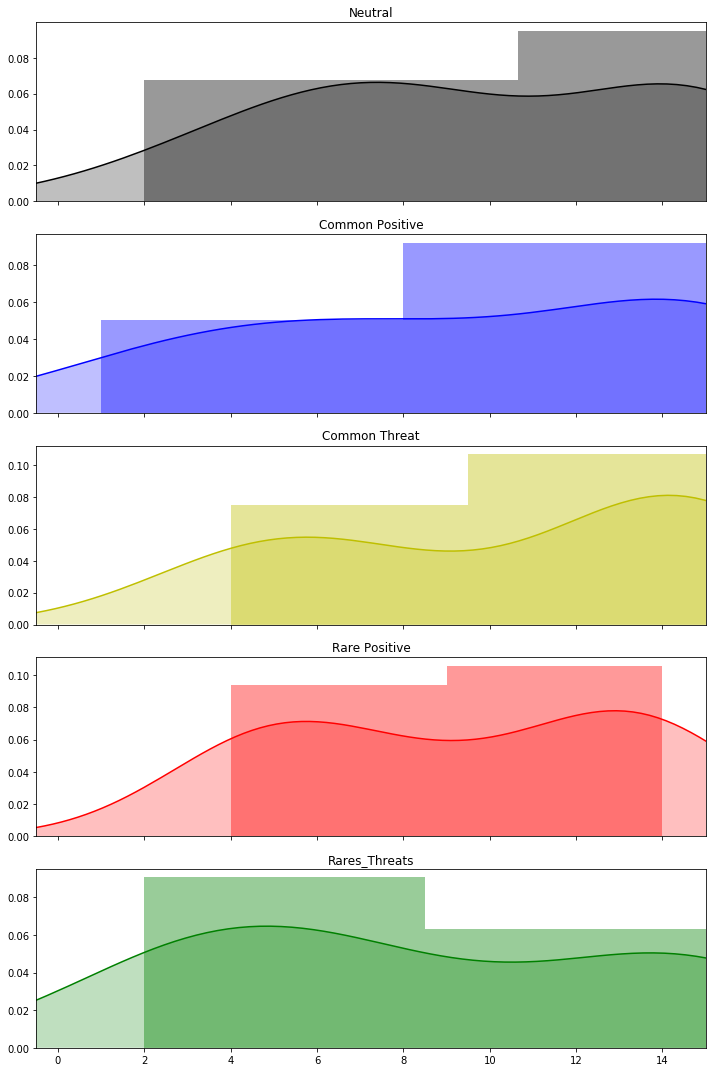

(17, 5, 15)


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from bayesian_bootstrap.bootstrap import mean, highest_density_interval
import pandas as pd
from scipy.stats import mode, ttest_rel
import numpy
n=[]
cp=[]
ct=[]
rp=[]
rt=[]


dn=[]
dqn=[]
drt=[]
dqt=[]


for sub in range(len(choice_data_clean)):
    sum_cond=np.sum(choice_data_clean[sub,:,:],axis=1)
    n.append(sum_cond[0])
    cp.append(sum_cond[1])
    ct.append(sum_cond[2])
    rp.append(sum_cond[3])
    rt.append(sum_cond[4])


print('neutral mean {}'.format(np.mean(n)))
print('\n')
unique, counts = numpy.unique(n, return_counts=True)
print(dict(zip(unique, counts)))
print('common positive mean {}'.format(np.mean(cp)))
print('\n')
unique, counts = numpy.unique(cp, return_counts=True)
print(dict(zip(unique, counts)))
print('common threat mean {}'.format(np.mean(ct)))
print('\n')
unique, counts = numpy.unique(ct, return_counts=True)
print(dict(zip(unique, counts)))
print('rare positive mean {}'.format(np.mean(rp)))
print('\n')
unique, counts = numpy.unique(rp, return_counts=True)
print(dict(zip(unique, counts)))
print('rare threat mean {}'.format(np.mean(rt)))
print('\n')
unique, counts = numpy.unique(rt, return_counts=True)
print(dict(zip(unique, counts)))

#graph distributions
f, axs = plt.subplots(5, 1, figsize=(10, 15),sharex=True)

ax0=sns.distplot(n, hist=True,kde_kws={"shade": True},color="k", ax=axs[0])
ax0.set(title='Neutral',xlabel='')

ax1=sns.distplot(cp, hist=True,kde_kws={"shade": True},color="b", ax=axs[1])
ax1.set(title='Common Positive',xlabel='')

ax2=sns.distplot(ct, hist=True,kde_kws={"shade": True},color="y", ax=axs[2])
ax2.set(title='Common Threat',xlabel='')

ax3=sns.distplot(rp, hist=True,kde_kws={"shade": True},color="r", ax=axs[3])
ax3.set(title='Rare Positive',xlabel='')

ax4=sns.distplot(rt, hist=True,kde_kws={"shade": True},color="g", ax=axs[4])
ax4.set(title='Rares_Threats',xlabel='')

plt.tight_layout()
plt.xlim(-0.5, 15)
plt.show()

print(choice_data_clean.shape)

In [26]:
print(ttest_rel(rt,cp))
print(choice_data_3d.shape)
print(choice_data_clean.shape)
#np.save('clean_data',choice_data_clean)

Ttest_relResult(statistic=-1.753046129372333, pvalue=0.09872920408505007)
(20, 5, 15)
(17, 5, 15)
